In [1]:
import sys
sys.path.append("../Scripts/")
import preprocess
import datasets

In [4]:
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score # import metrics to compute accuracy
from datasets import ColorImageDataset

In [3]:
dataset_dir = "../Data/Test/" # define the folder names for train dataset 
train_label_file = "../Data/test_data.csv"
model_path = "../Models/model_final_svm.p"

In [5]:
test_data = pd.read_csv(train_label_file)

test_dataset = ColorImageDataset(img_labels=test_data, dataset_dir=dataset_dir) # using torch dataset to wrap the datasets 

In [6]:
test_list_data = [data.tolist() for data, _ in test_dataset]
test_list_label = [label for _, label in test_dataset]


test_df = pd.DataFrame(test_list_data) # converting datasets to dataframe format as it is the input for sklearn classifiers 
test_label_df = pd.DataFrame(test_list_label, columns=["Labels"])

In [7]:
svc = pickle.load(open(model_path, "rb"))

y_pred=svc.predict(test_df)
# compute and print accuracy score
print(f'Test Set Accuracy = {accuracy_score(test_label_df, y_pred):.4f}')

Test Set Accuracy = 0.5556


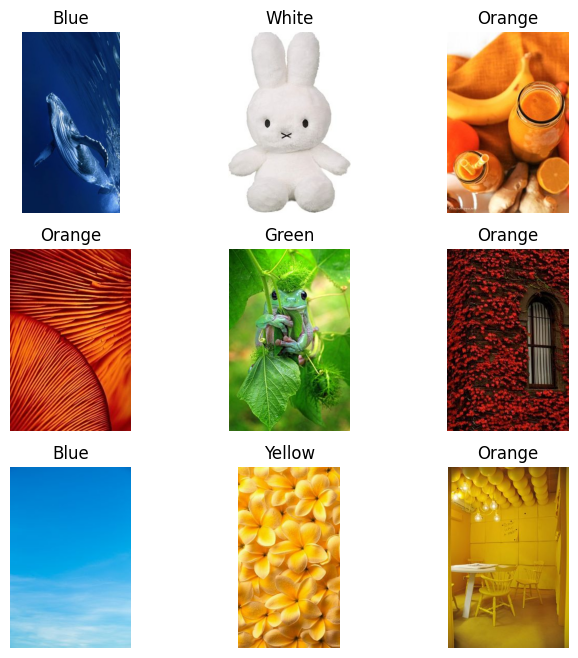

In [16]:
import matplotlib.pyplot as plt 
import torch 
import cv2 as cv
import os
from preprocess import generate_latent_variables

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    
    img_path = os.path.join(dataset_dir, test_dataset.img_labels.iloc[sample_idx, 0])
    img = cv.imread(img_path)
    feature_vec = generate_latent_variables(img)
    label = svc.predict(feature_vec)[0]
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()